# Perceptions

Without thinking about it, we each bring our own baggage to how we percieve the world. Our experiences, culture, and values all shape our perceptions. Among the most difficult tasks for scientists is to convey information as clearly as possible, so that it can transcend as many of these individal biases as possible and so that the greatest number of people percieve our results in the same way.

For the most part we all process visual information much more rapidly.

<img src="datavtable.jpg" alt="Drawing" style="width: 800px;"/>



[This example from Zoni Nation](https://github.com/zonination/perceptions/blob/master/README.md) illustrates one way in which data can help us understand how people commonly percieve lanugage:

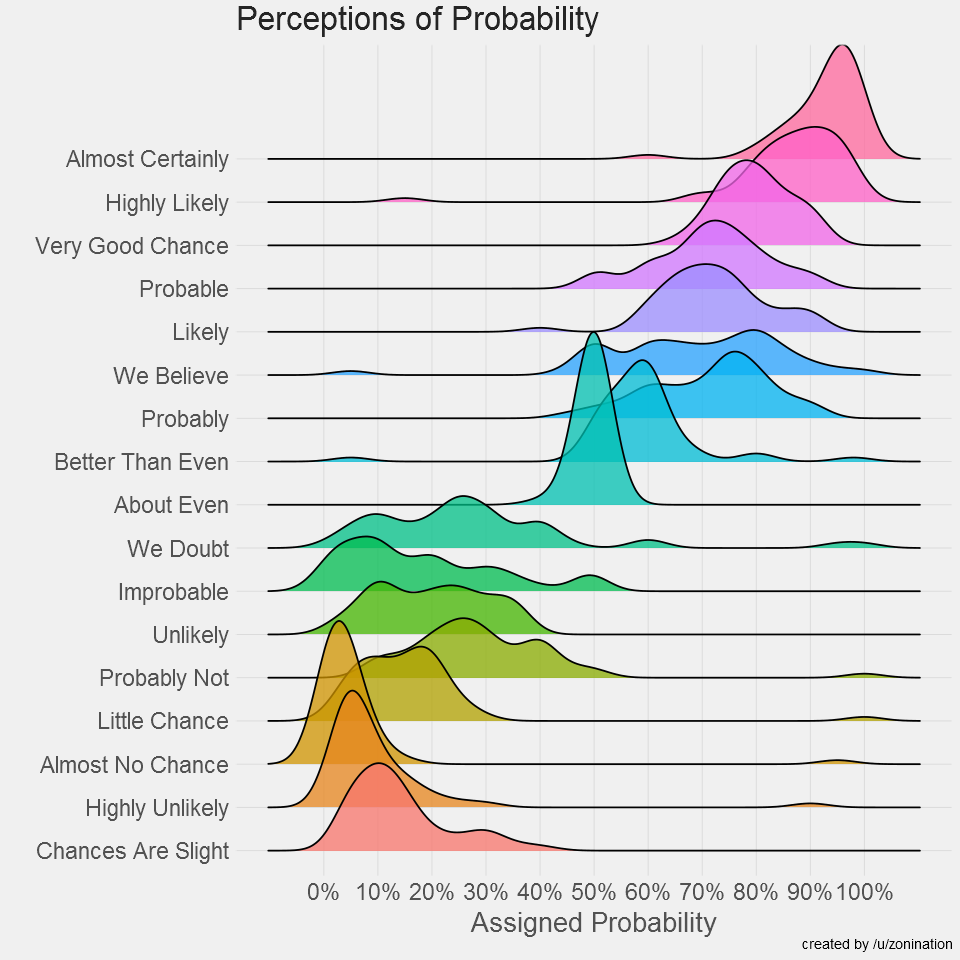

# Tufte

The grand patron of scientific graphics - **visualization** - is [Edward Tufte](https://www.edwardtufte.com/tufte/). *'a statistician and artist, and Professor Emeritus of Political Science, Statistics, and Computer Science at Yale University*'. If that sounds like a lot of things it is, the dude is utterly remarkable and, by all accounts, affable as hell. Tufte wrote (and self-published) four now classic books on visualization that, by coming up with princples underlying good visualizations, transformed discussion around how to graph data and convey information. Add [*Visual Display of Quantitative Information*](https://www.edwardtufte.com/tufte/books_vdqi) to your holiday gift list; it's specatcular. Today's lecture is entirely devoted to his design principles and how to implement them in R.

## "Design cannot rescue failed content." - E.T.

<img src="thinkingaboutvis.jpg" alt="Drawing" style="width: 800px;"/>

### Visualization excellence
1. Consists of complex ideas communicated with clarity, precision, and efficiency

2. Presents the greatest number of ideas in the shortest time with the least ink in the smallest space

3. Is nearly always multivariate

4. Requires telling the truth about the data


Acheiving these principles isn't necessarily easy - excellence isn't after all - but it is acheiveable. By keeping these ideas in mind and continually refining your visualization ideas, excellent graphics can follow. In addition, Tufte has complied so rules to help us along.



## The Rules:

1. Show Your Data
2. Use Graphics
3. Avoid Chartjunk
4. Utilize Data-ink
5. Use Labels
6. Utilize Micro/Macro
7. Separate Layers
8. Use Multiples
9. Utilize Color
10. Understand Narrative

### 1. Show Your Data

It may seem obvious, but soooo many graphics that end up being used in scientific publications do not show the underlying data used to create them. For example:

In [ ]:
library(ggplot2)
# Make plots a resonable size
options(repr.plot.width=6, repr.plot.height=6)

In [ ]:
mtcars2 <- mtcars
mtcars2$am <- factor(
  mtcars$am, labels = c('automatic', 'manual')
)
ggplot(mtcars2, aes(hp, mpg, color = am)) +
 geom_smooth() +
  theme(legend.position = 'bottom')

This is an interesting graph, showing the relationship between gas consumption and engine displacement for automatic and manual transmissions. Taken at face value, it appears that manual transmissions likely become more efficient around 100 horsepower, then become dramatically less efficient above that before settling back down. However intution tells us that this is highly unlkely, as there is no mechanism by which an increase and decline should happen. Increase with horsepower maybe (dudes hooning with a big engine for example) but not a subsequent decline. But when the data are presented:

In [ ]:
ggplot(mtcars2, aes(hp, mpg, color = am)) +  geom_point() + geom_smooth() +
  theme(legend.position = 'bottom')

This makes far more sense - the loess smoother fit to the data is clearly **overfitting** leading to a big spike due to adjacent low and high points prior to a gap in the data. By just looking at the points:

In [ ]:
ggplot(mtcars2, aes(hp, mpg, color = am)) +
  geom_point() + theme(legend.position = 'bottom')

the patern is far more clear - it looks like they have roughly paralell trends that can be better represented with a different smoother:

In [ ]:
ggplot(mtcars2, aes(hp, mpg, color = am)) +  
geom_point() + stat_smooth(method = "gam", formula = y ~ s(x), size = 1) + 
theme(legend.position = 'bottom')

or

In [ ]:
ggplot(mtcars2, aes(hp, mpg, color = am)) +  
geom_point() + 
stat_smooth(method = "lm", formula = y ~ poly(x, 2), size = 1) + 
theme(legend.position = 'bottom')

Choosing a smoother is an arbitrary decision that depends entirely on your objectives (like any statistical analysis) - this is why biological knowledge trumps statistical wizardry - with mechanistic models being the best (captures a process), liner models being the most general (capture overall trends), and smoothers being the most data-specific (captures patterns in the data you have, not in the data you might collect in the future). 

But the important principle here is that the data are **not hidden**!!

This also applies to boxplots:

In [ ]:
ToothGrowth$dose <- as.factor(ToothGrowth$dose)
head(ToothGrowth)

In [ ]:
p = ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot()

In [ ]:
p

In [ ]:
p + geom_jitter(shape=16, position=position_jitter(0.1))

## 2. Use Graphics

Graphics here refers to little drawings - things that convey information directly and more succinctly than any text could. Small graphics in particular can enhance a plot in ways that words cannot. For example silhouettes added to a fitted model can elevate the information content and add connection to the natural world, reminding us that these are living things we're studying:


<img src="Figure_2.png" alt="Drawing" style="width: 800px;"/>

<img src="vert.ed.jpg" alt="Drawing" style="width: 400px;"/>

## 3. Avoid chartjunk

There was a time, in and around the 1980's when 'graphics' began to appear in print media like newspapers. This trend was and still is driven by aspects of graphic design that do not mesh well with data visualization. It was remarkably awful:

<img src="books.jpg" alt="Drawing" style="width: 800px;"/>

And at it's worst these apsects could be used to present data in an intentionally misleading way!

<img src="guns.jpg" alt="Drawing" style="width: 800px;"/>

<img src="chartjunk.jpg" alt="Drawing" style="width: 800px;"/>

Chartjunk refers to any visual elements in a visualization that are not necessary to understand information represented on the graph or that distract from understanding this information.

---
# Task 1
---

Chartjunk aside, in terms of information conent what else is wrong with the poceeding three graphics?

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


While the pie-eating clock is awful (or any pie chart for that matter), there are more subtle examples, even in R:

In [ ]:
height = c(1,2,3)
bardensity = c(10,10,20)
barangle = c(45,135,90)
barplot(height, density = bardensity, angle = barangle) 

These plots could simply use colours, or, more often than not, could avoid using barplots altogether. And they also display an interesting visual issue: Moiré vibration! What's that? Look deeply into the figure:

In [ ]:
#options(repr.plot.width=7, repr.plot.height=4)

In [ ]:
plot(NA,NA, xlim=c(0,100), ylim=c(0,100), ylab=NA, xlab=NA, yaxt='n', xaxt='n', bty = "n")
for(i in seq(-15,500,6)) {
  abline(i, -3, lwd=4)
}

Annoying isn't it? Now you know. 

Textured fill lines - don't use 'em; rely on colours instead (but more on this in Lecture 12).

## 4. Utilize data-ink

When graphics get printed, they use ink to do it, and data-ink refers to the percentage of ink used that conveys information. The general principle is to remove as much ink from a graphic as possible while retaining ink that helps convey your information most effectively. **Remember: above all else convey information as clearly as possible**.

How can data-ink be reduced? Well Tufte has extreme examples:

In [ ]:
boxplot(len ~ dose+supp, data=ToothGrowth)

Can, in the right hands become:

In [ ]:
panel.tuftebxp <- 
function (x, y, box.ratio = 1, box.width = box.ratio/(1 + box.ratio), horizontal=FALSE,
    pch = box.dot$pch, col = box.dot$col, 
    alpha = box.dot$alpha, cex = box.dot$cex, font = box.dot$font, 
    fontfamily = box.dot$fontfamily, fontface = box.dot$fontface, 
    fill = box.rectangle$fill, varwidth = FALSE, notch = FALSE, 
    notch.frac = 0.5, ..., levels.fos = if (horizontal) sort(unique(y)) else sort(unique(x)), 
    stats = boxplot.stats, coef = 1.5, do.out = TRUE, identifier = "bwplot") 
{
    if (all(is.na(x) | is.na(y))) 
        return()
    x <- as.numeric(x)
    y <- as.numeric(y)
    box.dot <- trellis.par.get("box.dot")
    box.rectangle <- trellis.par.get("box.rectangle")
    box.umbrella <- trellis.par.get("box.umbrella")
    plot.symbol <- trellis.par.get("plot.symbol")
    fontsize.points <- trellis.par.get("fontsize")$points
    cur.limits <- current.panel.limits()
    xscale <- cur.limits$xlim
    yscale <- cur.limits$ylim
    if (!notch) 
        notch.frac <- 0
    #removed horizontal code
     blist <- tapply(y, factor(x, levels = levels.fos), stats, 
            coef = coef, do.out = do.out)
        blist.stats <- t(sapply(blist, "[[", "stats"))
        blist.out <- lapply(blist, "[[", "out")
        blist.height <- box.width
        if (varwidth) {
            maxn <- max(table(x))
            blist.n <- sapply(blist, "[[", "n")
            blist.height <- sqrt(blist.n/maxn) * blist.height
        }
        blist.conf <- if (notch) 
            sapply(blist, "[[", "conf")
        else t(blist.stats[, c(2, 4), drop = FALSE])
        ybnd <- cbind(blist.stats[, 3], blist.conf[2, ], blist.stats[, 
            4], blist.stats[, 4], blist.conf[2, ], blist.stats[, 
            3], blist.conf[1, ], blist.stats[, 2], blist.stats[, 
            2], blist.conf[1, ], blist.stats[, 3])
        xleft <- levels.fos - blist.height/2
        xright <- levels.fos + blist.height/2
        xbnd <- cbind(xleft + notch.frac * blist.height/2, xleft, 
            xleft, xright, xright, xright - notch.frac * blist.height/2, 
            xright, xright, xleft, xleft, xleft + notch.frac * 
                blist.height/2)
        xs <- cbind(xbnd, NA_real_)
        ys <- cbind(ybnd, NA_real_)
        panel.segments(rep(levels.fos, 2), c(blist.stats[, 2], 
            blist.stats[, 4]), rep(levels.fos, 2), c(blist.stats[, 
            1], blist.stats[, 5]), col = box.umbrella$col, alpha = box.umbrella$alpha, 
            lwd = box.umbrella$lwd, lty = box.umbrella$lty, identifier = paste(identifier, 
                "whisker", sep = "."))

        if (all(pch == "|")) {
            mult <- if (notch) 
                1 - notch.frac
            else 1
            panel.segments(levels.fos - mult * blist.height/2, 
                blist.stats[, 3], levels.fos + mult * blist.height/2, 
                blist.stats[, 3], lwd = box.rectangle$lwd, lty = box.rectangle$lty, 
                col = box.rectangle$col, alpha = alpha, identifier = paste(identifier, 
                  "dot", sep = "."))
        }
        else {
            panel.points(x = levels.fos, y = blist.stats[, 3], 
                pch = pch, col = col, alpha = alpha, cex = cex, 
                 identifier = paste(identifier, 
                  "dot", sep = "."))
        }
        panel.points(x = rep(levels.fos, sapply(blist.out, length)), 
            y = unlist(blist.out), pch = plot.symbol$pch, col = plot.symbol$col, 
            alpha = plot.symbol$alpha, cex = plot.symbol$cex*0.5, 
            identifier = paste(identifier, "outlier", sep = "."))

}

In [ ]:
library(lattice)

In [ ]:
bwplot(len ~ dose+supp, data=ToothGrowth, panel= 
         function(x,y, ...) panel.tuftebxp(x=x,y=y,...))

The key with data-ink is to remove every possible bit of ink from a plot, then add back only a minimum level of detail needed to satisfy yourself on what looks 'right'.

---
# Task 2
---

Plot the median value of the ToothGrowth length as a black dot (`pch` and `bg` are important here), and use the `lines()` function to plot approximate 50% ($\pm$1 SD) and 95% ($\pm$2 SD) confidence intervals as thick and thin lines respectively. Hints: you'll need to specifiy `ylim` values in `plot` to see the entire line, and use `lwd` in lines to make the thicker 50% line.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


## 5. Use labels

Used judiciously, text labels on graphics convey much deeper meaning and enable connections to be made among graphics. The previous figure shows this in country labels on panel C:

<img src="Figure_2.png" alt="Drawing" style="width: 800px;"/>

Without lables, these dots would fall flat; with it, the figure appeals to our nationalistic tendencies. You can also use these labels to highlight particular data points that you want a reader to focus on:

<img src="Sleeper.sharks.jpg" alt="Drawing" style="width: 800px;"/>

---
# Task 3
---

Plot `hp` versus `mpg` in the `mtcars2` data and label the dots of four cars of interest to you in the data.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


## 6. Utilize Micro/Macro

A more subtle but still important rule, Tufte recommends adding detail to clarify meaning. Often this is an approach where a visualization contains enormous detail, so that an overall pattern emerges:


<img src="F1large.jpg" alt="Drawing" style="width: 800px;"/>

<img src="Full.ed.jpg" alt="Drawing" style="width: 800px;"/>

Or this example from the [New York Times](https://archive.nytimes.com/www.nytimes.com/interactive/2012/05/05/sports/baseball/mariano-rivera-and-his-peers.html?ref=baseball)

## 7. Separate Layers

Visually separating elements through the use of colour or shading is a critical skill to develop in producing good graphics. Visual separation allows information elements to be clear on their own, but also tied to a cohesive whole:

<img src="Figure_2.png" alt="Drawing" style="width: 800px;"/>


## 8. Use Multiples

Among the most important graphic techniques emphasized by Tufte is the use of 'small multiples' repeated panels that convey (often temporal) differences (often in maps). For example this figure is highly effective:

<img src="vouchermaps.png" alt="Drawing" style="width: 800px;"/>



Or something like:

<img src="addl.png" alt="Drawing" style="width: 800px;"/>


Or this from the [New York Times](https://www.nytimes.com/interactive/2018/01/21/world/year-in-weather.html#egtk)

These visualizations allow your eye to pass from one panel to the other, encouraging you to make connections among them. A graphical home-run.

---
# Task 5
---

Use the `facet_wrap` geom to plot player age versus batting average for every team in the MLB 2017 batting data. Be sure to label each panel with the team name code.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


## 9. Utilize colour

Colour, and mastery of it, will set your visualizations apart. Color can be used to delineate between levels of discrete varaibels or grouping or used to visualize continuous variables:

### Colour Palettes

<img src="color.jpg" alt="Drawing" style="width: 800px;"/>


The New York Times (again) uses colour excellently: 

<img src="oil.jpg" alt="Drawing" style="width: 800px;"/>

And are often a good source to sample colours from, using the eyedropper tool in your faviourite application (more on this next week). A great source for choosing colours is [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

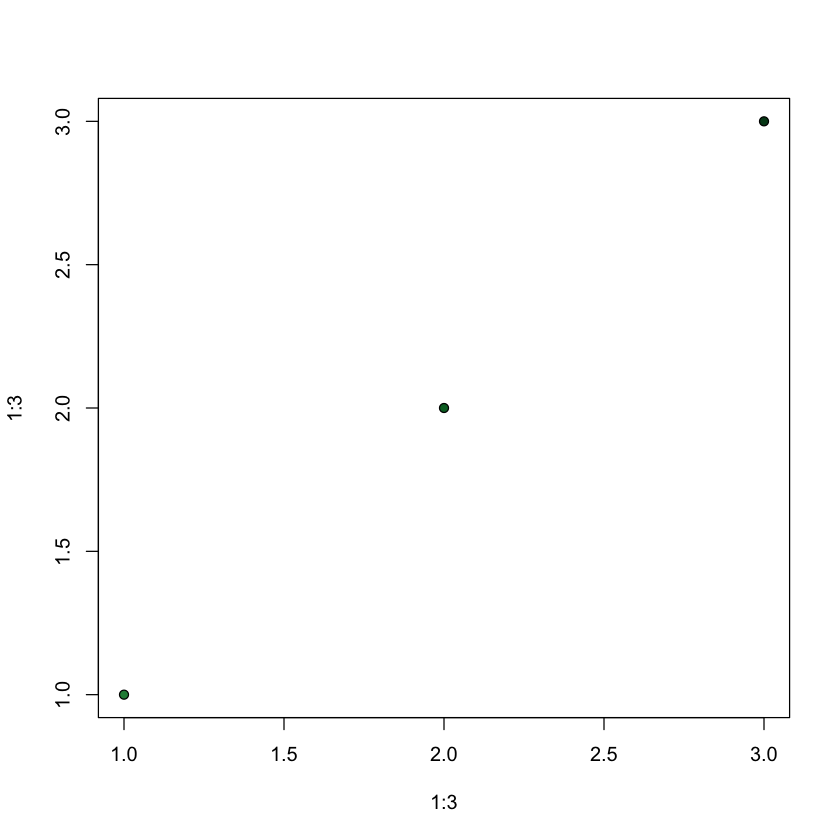

In [1]:
colx = c('#238b45','#006d2c','#00441b')

plot(1:3,1:3,bg=colx, pch=21)

### Custom Color Creation/Selection
You can also create your own colors using hex codes, or use [online tools](https://html-color-codes.info/colors-from-image/) to select colors you like!

<img src="colorselection.jpg" alt="Drawing" style="width: 800px;"/>



---
# Task 4
---

Select a good colour scheme from ColorBrewer and use those values to differentiate the boxplots from `ggplot` object `p` above

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


## 10. Understand Narrative

Perhaps the hardest thing to convey but the most important skill to have in good graphical work is to understand narrative - that is, that your graphics need to tell a story. In fact, when I write papers for my own research the first step is always to figure out the figures, then write the text around them. Having a narrative that leads people from one idea to another is grounded in our deepest ideas and cultures. It remains powerful today:

<img src="minard.gif" alt="Drawing" style="width: 1000px;"/>



# What have you learned and what's next?

The point of today's lab was to introduce Tufte's principles for graphical excellence.

**You should at this point be comfortable:**
 1. Knowing why each of the rules is important

Next week we will get into some final details about graphics and how to produce them.

---
# ** A bientôt ** !